[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ivanvladimir/maquinas_notebooks/blob/main/lfya/06%20Depende%20del%20contexto.ipynb)

In [1]:
# Execute if not installes
!pip install maquinas

You should consider upgrading via the '/home/ivanvladimir/projects/maquinas_examples/env/bin/python3.6 -m pip install --upgrade pip' command.


In [2]:
from maquinas.contextfree.cfg import ContextFreeGrammar as CFG

No terminal : S
Terminals   : b, a
Start       : S
Productions :
 S → aSa | bSb | ε


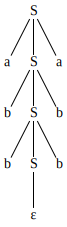

In [3]:
wwʳ=CFG('S->aSa; S->bSb; S-> epsilon')
print(wwʳ.summary())
roots,chart,forest=wwʳ.parse('abbbba')
wwʳ.graph_trees(wwʳ.extract_trees(forest))

No terminal : S
Terminals   : b, a
Start       : S
Productions :
 S → aSa | bSb | a | b


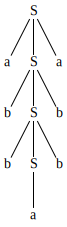

In [4]:
wawʳ=CFG('S->aSa; S->bSb; S-> a; S-> b')
print(wawʳ.summary())
roots,chart,forest=wawʳ.parse('abbabba')
wawʳ.graph_trees(wawʳ.extract_trees(forest))

No terminal : S
Terminals   : b, a
Start       : S
Productions :
 S → aSa | bSb | a | b | ε


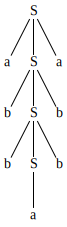

In [5]:
w_wʳ=CFG('S->aSa; S->bSb; S-> a; S-> b; S-> epsilon')
print(w_wʳ.summary())
roots,chart,forest=w_wʳ.parse('abbabba')
w_wʳ.graph_trees(w_wʳ.extract_trees(forest))

No terminal : S
Terminals   : b, m, a
Start       : S
Productions :
 S → aSa | bSb | m


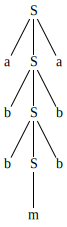

In [6]:
wmwʳ=CFG('S->aSa; S->bSb; S-> m;')
print(wmwʳ.summary())
roots,chart,forest=wmwʳ.parse('abbmbba')
wmwʳ.graph_trees(wmwʳ.extract_trees(forest))

In [7]:
from maquinas.contextfree.pda import PushDownAutomaton as PDA
from maquinas.simulation import Simulation

In [8]:
# Ejercicio uno
wwʳ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b'],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0')]),
            (('q_0','a','A'),[('q_0','AA')]),
            (('q_0','a','B'),[('q_0','AB')]),
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','A'),[('q_0','BA')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','epsilon','Z0'),[('q_1','Z0')]), 
            (('q_0','epsilon','A'),[('q_1','A')]),
            (('q_0','epsilon','B'),[('q_1','B')]),
            (('q_1','a','A'),[('q_1','epsilon')]),
            (('q_1','b','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [9]:
for q,a,w_ in wwʳ.delta_stepwise("abbbba"):
    if a:
        print(f"{a} -> {wwʳ.states2string(q)}", end=",\n ")
    else:
        print(f"{wwʳ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {wwʳ.states2string(res)} Se acepta?", "Sí" if wwʳ.acceptor(res) else "No" )

q_0, Z₀]
 a -> q_0, A Z₀] | q_1, A Z₀],
 b -> q_0, B A Z₀] | q_1, B A Z₀],
 b -> q_0, B B A Z₀] | q_1, A Z₀] | q_1, B B A Z₀],
 b -> q_0, B B B A Z₀] | q_1, B A Z₀] | q_1, B B B A Z₀],
 b -> q_0, B B B B A Z₀] | q_1, A Z₀] | q_1, B B A Z₀] | q_1, B B B B A Z₀],
 a -> q_0, A B B B B A Z₀] | q_1, Z₀] | q_1, A B B B B A Z₀] | q_2, Z₀],
 
Con q_0, A B B B B A Z₀] | q_1, Z₀] | q_1, A B B B B A Z₀] | q_2, Z₀] Se acepta? Sí


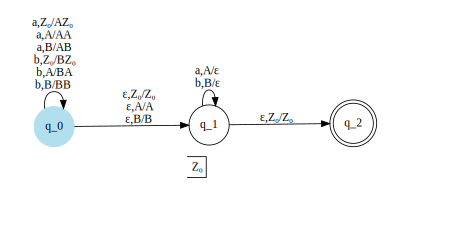

In [10]:
wwʳ.save_img('wwr')
wwʳ.save_gif("abbbba",filename="wwr.gif",show=False)
wwʳ.graph()

In [11]:
# Ejercicio uno
wawʳ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b'],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0'),('q_1','Z0')]),
            (('q_0','a','A'),[('q_0','AA'),('q_1','A')]),
            (('q_0','a','B'),[('q_0','AB'),('q_1','B')]),
            (('q_0','b','Z0'),[('q_0','BZ0'),('q_1','Z0')]),
            (('q_0','b','A'),[('q_0','BA'),('q_1','A')]),
            (('q_0','b','B'),[('q_0','BB'),('q_1','B')]),
            (('q_1','a','A'),[('q_1','epsilon')]),
            (('q_1','b','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [12]:
for q,a,w_ in wawʳ.delta_stepwise("abbabba"):
    if a:
        print(f"{a} -> {wawʳ.states2string(q)}", end=",\n ")
    else:
        print(f"{wawʳ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {wawʳ.states2string(res)} Se acepta?", "Sí" if wawʳ.acceptor(res) else "No" )

q_0, Z₀]
 a -> q_0, A Z₀] | q_1, Z₀] | q_2, Z₀],
 b -> q_1, A Z₀] | q_0, B A Z₀],
 b -> q_0, B B A Z₀] | q_1, B A Z₀],
 a -> q_1, B B A Z₀] | q_0, A B B A Z₀],
 b -> q_1, B A Z₀] | q_1, A B B A Z₀] | q_0, B A B B A Z₀],
 b -> q_1, A Z₀] | q_0, B B A B B A Z₀] | q_1, B A B B A Z₀],
 a -> q_1, Z₀] | q_1, B B A B B A Z₀] | q_0, A B B A B B A Z₀] | q_2, Z₀],
 
Con q_1, Z₀] | q_1, B B A B B A Z₀] | q_0, A B B A B B A Z₀] | q_2, Z₀] Se acepta? Sí


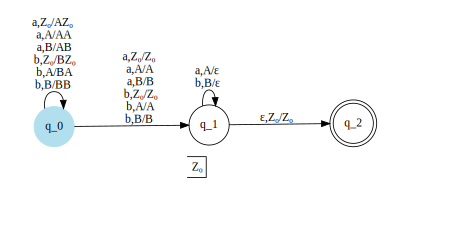

In [13]:
wawʳ.save_img('wawr')
wawʳ.save_gif("abbabba",filename="wawr.gif",show=False)
wawʳ.graph()

In [14]:
# Ejercicio uno
w_wʳ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b'],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0'),('q_1','Z0')]),
            (('q_0','a','A'),[('q_0','AA'),('q_1','A')]),
            (('q_0','a','B'),[('q_0','AB'),('q_1','B')]),
            (('q_0','b','Z0'),[('q_0','BZ0'),('q_1','Z0')]),
            (('q_0','b','A'),[('q_0','BA'),('q_1','A')]),
            (('q_0','b','B'),[('q_0','BB'),('q_1','B')]),
            (('q_0','epsilon','Z0'),[('q_1','Z0')]), 
            (('q_0','epsilon','A'),[('q_1','A')]),
            (('q_0','epsilon','B'),[('q_1','B')]),
            (('q_1','a','A'),[('q_1','epsilon')]),
            (('q_1','b','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [15]:
for q,a,w_ in w_wʳ.delta_stepwise("abbabba"):
    if a:
        print(f"{a} -> {w_wʳ.states2string(q)}", end=",\n ")
    else:
        print(f"{w_wʳ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {w_wʳ.states2string(res)} Se acepta?", "Sí" if w_wʳ.acceptor(res) else "No" )

q_0, Z₀]
 a -> q_0, A Z₀] | q_1, Z₀] | q_1, A Z₀] | q_2, Z₀],
 b -> q_1, A Z₀] | q_0, B A Z₀] | q_1, B A Z₀],
 b -> q_0, B B A Z₀] | q_1, B A Z₀] | q_1, A Z₀] | q_1, B B A Z₀],
 a -> q_1, B B A Z₀] | q_0, A B B A Z₀] | q_1, Z₀] | q_1, A B B A Z₀] | q_2, Z₀],
 b -> q_1, B A Z₀] | q_1, A B B A Z₀] | q_0, B A B B A Z₀] | q_1, B A B B A Z₀],
 b -> q_1, A Z₀] | q_0, B B A B B A Z₀] | q_1, B A B B A Z₀] | q_1, A B B A Z₀] | q_1, B B A B B A Z₀],
 a -> q_1, Z₀] | q_1, B B A B B A Z₀] | q_0, A B B A B B A Z₀] | q_1, B B A Z₀] | q_2, Z₀] | q_1, A B B A B B A Z₀],
 
Con q_1, Z₀] | q_1, B B A B B A Z₀] | q_0, A B B A B B A Z₀] | q_1, B B A Z₀] | q_2, Z₀] | q_1, A B B A B B A Z₀] Se acepta? Sí


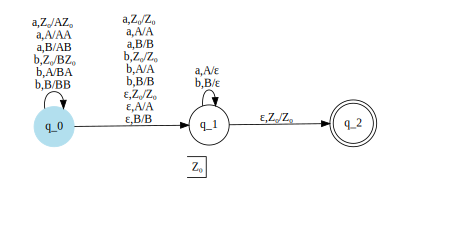

In [16]:
w_wʳ.save_img('w_wr')
w_wʳ.save_gif("abbabba",filename="w_wr.gif",show=False)
w_wʳ.graph()

In [17]:
# Ejercicio dos
wmwʳ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b','m'],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0')]),
            (('q_0','a','A'),[('q_0','AA')]),
            (('q_0','a','B'),[('q_0','AB')]),
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','A'),[('q_0','BA')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','m','Z0'),[('q_1','Z0')]), 
            (('q_0','m','A'),[('q_1','A')]),
            (('q_0','m','B'),[('q_1','B')]),
            (('q_1','a','A'),[('q_1','epsilon')]),
            (('q_1','b','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [18]:
for q,a,w_ in wmwʳ.delta_stepwise("abbmbba"):
    if a:
        print(f"{a} -> {wmwʳ.states2string(q)}", end=",\n ")
    else:
        print(f"{wmwʳ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {wmwʳ.states2string(res)} Se acepta?", "Sí" if wmwʳ.acceptor(res) else "No" )

q_0, Z₀]
 a -> q_0, A Z₀],
 b -> q_0, B A Z₀],
 b -> q_0, B B A Z₀],
 m -> q_1, B B A Z₀],
 b -> q_1, B A Z₀],
 b -> q_1, A Z₀],
 a -> q_1, Z₀] | q_2, Z₀],
 
Con q_1, Z₀] | q_2, Z₀] Se acepta? Sí


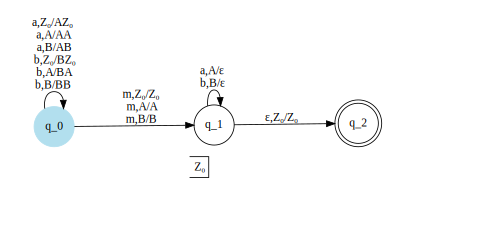

In [19]:
wmwʳ.save_img('wmwr')
wmwʳ.save_gif("abbmbba",filename="wmwr.gif",show=False)
wmwʳ.graph()

In [20]:
# Ejercicio tres
bn1an_one=PDA(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b',],
         gamma=['B'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','b','Z0'),[('q_1','Z0')]),
            (('q_1','b','Z0'),[('q_1','BZ0')]),
            (('q_1','b','B'),[('q_1','BB')]),
            (('q_1','a','B'),[('q_2','epsilon')]),
            (('q_2','a','B'),[('q_2','epsilon')]), 
            (('q_2','epsilon','Z0'),[('q_3','Z0')]),
         ]
    )

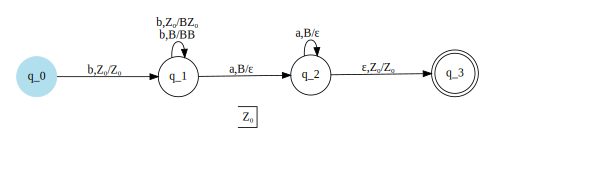

In [21]:
bn1an_one.save_img('bn1an_one')
bn1an_one.save_gif("bbbbaaa",filename="bn1an_one.gif",show=False)
bn1an_one.graph()

In [22]:
bn1an_two=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b',],
         gamma=['B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','b','B'),[('q_1','B')]),
            (('q_0','b','Z0'),[('q_1','Z0')]),
            (('q_1','a','B'),[('q_1','epsilon')]), 
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

AlreadyExistsPDATransition: Transition (q_0,b,B) already exists with destination [('q_0', ('B', 'B'))]

In [ ]:
bn1an_two.save_img('bn1an_two')
bn1an_two.save_gif("bbbbaaa",filename="bn1an_two.gif",show=False)
bn1an_two.graph()

In [ ]:
bn1an_three=PDA(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b',],
         gamma=['B'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','a','B'),[('q_1','epsilon')]),
            (('q_1','a','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','B'),[('q_2','epsilon')]), 
            (('q_2','epsilon','Z0'),[('q_3','Z0')]),
         ]
    )

In [ ]:
bn1an_three.save_img('bn1an_three')
bn1an_three.save_gif("bbbbaaa",filename="bn1an_three.gif",show=False)
bn1an_three.graph()

In [ ]:
# Ejercicio dos
samecthanaplusb=PDA(Q=['q_0','q_1'],
         sigma=['a','b','c'],
         gamma=['A','C'],
         q_0='q_0',
         A=['q_1'],
         delta=[
            (('q_0','a','Z0'),[('q_0','CZ0')]),
            (('q_0','a','C'),[('q_0','CC')]),
            (('q_0','a','A'),[('q_0','epsilon')]),
            (('q_0','b','Z0'),[('q_0','CZ0')]),
            (('q_0','b','C'),[('q_0','CC')]),
            (('q_0','b','A'),[('q_0','epsilon')]),
            (('q_0','c','Z0'),[('q_0','AZ0')]),
            (('q_0','c','A'),[('q_0','AA')]),
            (('q_0','c','C'),[('q_0','epsilon')]),
            (('q_0','epsilon','Z0'),[('q_1','Z0')]),
         ]
    )

In [ ]:
samecthanaplusb.save_img('samecthanaplusb')
samecthanaplusb.save_gif("caccbaaaacaccc",filename="samecthanaplusb.gif",show=False)
samecthanaplusb.graph()

In [ ]:
aibj3=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b',],
         gamma=['1','2','0'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','1Z0')]),
            (('q_0','a','1'),[('q_0','2')]),
            (('q_0','a','2'),[('q_0','epsilon')]),
            (('q_0','epsilon','Z0'),[('q_1','Z0')]), 
            (('q_0','b','Z0'),[('q_1','1Z0')]),
            (('q_0','b','1'),[('q_1','2')]),
            (('q_0','b','2'),[('q_1','epsilon')]),
            (('q_1','b','Z0'),[('q_1','1Z0')]),
            (('q_1','b','1'),[('q_1','2')]),
            (('q_1','b','2'),[('q_1','epsilon')]), 
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [ ]:
aibj3.save_img('aibj3')
aibj3.save_gif("aaaabb",filename="aibj3.gif",show=False)
aibj3.graph()

In [ ]:
aibj3_two=PDA(Q=['q_0','q_1','q_2','q_0_','q_1_','q_2_'],
         sigma=['a','b',],
         gamma=['1','2','0'],
         q_0='q_0',
         A=['q_0','q_0_'],
         delta=[
            (('q_0','a','Z0'),[('q_1','Z0')]),
            (('q_1','a','Z0'),[('q_2','Z0')]),
            (('q_2','a','Z0'),[('q_0','Z0')]),
            (('q_0','b','Z0'),[('q_1_','Z0')]),
            (('q_1','b','Z0'),[('q_2_','Z0')]),
            (('q_2','b','Z0'),[('q_0_','Z0')]),
            (('q_0_','b','Z0'),[('q_1_','Z0')]),
            (('q_1_','b','Z0'),[('q_2_','Z0')]),
            (('q_2_','b','Z0'),[('q_0_','Z0')]),
         ]
    )

In [ ]:
aibj3_two.save_img('aibj3_two')
aibj3_two.save_gif("aaaabb",filename="aibj3_two.gif",show=False)
aibj3_two.graph()

In [ ]:
aibj3_three=PDA(Q=['q_0','q_1','q_2','q_3','q_4'],
         sigma=['a','b',],
         gamma=['I'],
         q_0='q_0',
         A=['q_4'],
         delta=[
            (('q_0','a','Z0'),[('q_0','IZ0')]),
            (('q_0','a','I'),[('q_0','II')]),
            (('q_0','b','Z0'),[('q_1','IZ0')]),
            (('q_0','b','I'),[('q_1','II')]),
            (('q_1','b','I'),[('q_1','II')]),             
            (('q_1','epsilon','I'),[('q_2','epsilon')]),
            (('q_2','epsilon','I'),[('q_3','epsilon')]),
            (('q_3','epsilon','I'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_4','Z0')]),
         ]
    )

In [ ]:
aibj3_three.save_img('aibj3_three')
aibj3_three.save_gif("aaaabb",filename="aibj3_three.gif",show=False)
aibj3_three.graph()

In [ ]:
aibj3_four=PDA(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b',],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','a','Z0'),[('q_1','AZ0')]),
            (('q_0','a','A'),[('q_1','AA')]),
            (('q_0','b','Z0'),[('q_1','BZ0')]),
            (('q_0','b','B'),[('q_1','BB')]), 
            (('q_1','a','A'),[('q_2','AA')]),
            (('q_1','b','A'),[('q_2','BA')]),
            (('q_1','b','B'),[('q_2','BB')]), 
            (('q_2','a','A'),[('q_0','AA')]),
            (('q_2','b','A'),[('q_0','BA')]),
            (('q_2','b','B'),[('q_0','BB')]),
            (('q_0','epsilon','A'),[('q_3','A')]),
            (('q_0','epsilon','B'),[('q_3','B')]),
         ]
    )

In [ ]:
aibj3_four.save_img('aibj3_four')
aibj3_four.save_gif("aaaabb",filename="aibj3_four.gif",show=False)
aibj3_four.graph()